# 4. Indexing, slicing

Each element of an array can be located by its position in each dimension. Numpy offers multiple ways to access single elements or groups of elements in very efficient ways. We will illustrate these concepts both with small simple matrices as well as a regular image, in order to illustrate them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.gray();
import skimage

<Figure size 640x480 with 0 Axes>

We first load an image included in the scikit-image package:

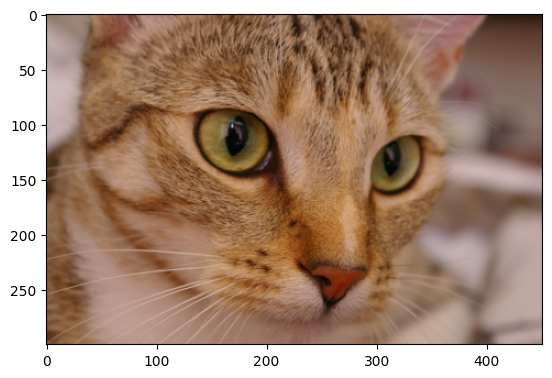

In [2]:
image = skimage.data.chelsea()
plt.imshow(image);

We can check the dimensions of the image and see that it is an RGB image with 3 channels:

In [3]:
image.shape

(300, 451, 3)

## 4.1 Accessing single values

We create a small 2D array to use as an example:

In [4]:
normal_array = np.random.normal(10, 2, (3,4))
normal_array

array([[ 8.01469972,  8.53483086,  8.67002075, 12.58744592],
       [13.19859031,  9.86805102,  9.52229503, 10.43242926],
       [10.17942102,  8.28393536, 13.53404229,  6.52547595]])

It is very easy to access an array's values. One can just pass an *index* for each dimensions. For example to recover the value on the last row and second column of the ```normal_array``` array we just write (remember counting starts at 0): 

In [5]:
single_value = normal_array[2,1]
single_value

8.283935355908142

What is returned in that case is a single number that we can re-use:

In [6]:
single_value += 10
single_value

18.28393535590814

And that change doesn't affect the original value in the array:

In [7]:
normal_array

array([[ 8.01469972,  8.53483086,  8.67002075, 12.58744592],
       [13.19859031,  9.86805102,  9.52229503, 10.43242926],
       [10.17942102,  8.28393536, 13.53404229,  6.52547595]])

However we can also directly change the value in an array:

In [8]:
normal_array[2,1] = 23

In [9]:
normal_array

array([[ 8.01469972,  8.53483086,  8.67002075, 12.58744592],
       [13.19859031,  9.86805102,  9.52229503, 10.43242926],
       [10.17942102, 23.        , 13.53404229,  6.52547595]])

## 4.2 Accessing part of an array with indices: slicing

### 4.2.1 Selecting a range of elements

One can also select multiple elements in each dimension (e.g. multiple rows and columns in 2D) by using the ```start:end:step``` syntax. By default, if omitted, ```start=0```, ```end=last element``` and ```step=1```. For example to select the first **and** second rows of the first column, we can write:

In [10]:
normal_array[0:2,0]

array([ 8.01469972, 13.19859031])

Note that the ```end``` element is **not** included. One can use the same notation for all dimensions:

In [11]:
normal_array[0:2,2:4]

array([[ 8.67002075, 12.58744592],
       [ 9.52229503, 10.43242926]])

In [12]:
normal_array[1:,2:4]

array([[ 9.52229503, 10.43242926],
       [13.53404229,  6.52547595]])

### 4.2.2 Selecting all elements
If we only specify ```:```, it means we want to recover all elements in that dimension:

In [13]:
normal_array[:,2:4]

array([[ 8.67002075, 12.58744592],
       [ 9.52229503, 10.43242926],
       [13.53404229,  6.52547595]])

Also in general, if you only specify the value for a single axis, this will take the first element of the first dimension:

In [14]:
normal_array

array([[ 8.01469972,  8.53483086,  8.67002075, 12.58744592],
       [13.19859031,  9.86805102,  9.52229503, 10.43242926],
       [10.17942102, 23.        , 13.53404229,  6.52547595]])

In [15]:
normal_array[1]

array([13.19859031,  9.86805102,  9.52229503, 10.43242926])

Finally note that if you want to recover only one element along a dimension (single row, column etc), you can do that in two ways:

In [16]:
normal_array[0,:]

array([ 8.01469972,  8.53483086,  8.67002075, 12.58744592])

This returns a one-dimensional array containing a single row from the original array:

In [17]:
normal_array[0,:].shape

(4,)

Instead, if you specify actual boundaries that still return only a single row:

In [18]:
normal_array[0:1,:]

array([[ 8.01469972,  8.53483086,  8.67002075, 12.58744592]])

In [19]:
normal_array[0:1,:].shape

(1, 4)

you recover a tow dimensional array where one of the dimensions has a size of 1.

### 4.2.3 Illustration on an image

We can for example only select half the rows of the image but all columns and channels:

In [20]:
image.shape

(300, 451, 3)

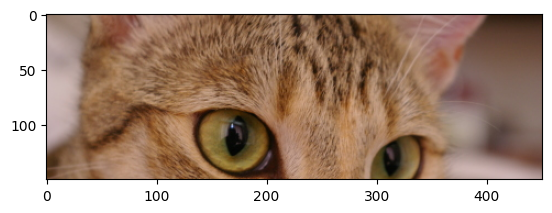

In [21]:
sub_image = image[0:150,:,:]
plt.imshow(sub_image);

Or we can take every fith column and row from a single channel, which returns a pixelated version of the original image:

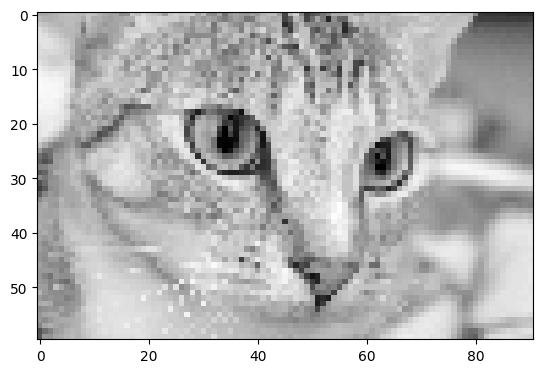

In [22]:
plt.imshow(image[::5,::5,0]);

## 4.3 Sub-arrays are not copies!

As often with Python when you create a new variable using a sub-array, that variable **is not independent** from the original variable:

In [23]:
sub_array = normal_array[:,2:4]

In [24]:
sub_array

array([[ 8.67002075, 12.58744592],
       [ 9.52229503, 10.43242926],
       [13.53404229,  6.52547595]])

In [25]:
normal_array

array([[12.99205086,  7.7157832 , 14.66021898,  8.21412356],
       [ 9.19391119,  7.92142871, 13.31222213,  8.19957688],
       [11.08009573, 23.        , 12.71096417, 10.09637761]])

If for example we modify ```normal_array```, this is going to be reflected in ```sub_array``` too:

In [26]:
normal_array[0,2] = 100

In [27]:
normal_array

array([[ 12.99205086,   7.7157832 , 100.        ,   8.21412356],
       [  9.19391119,   7.92142871,  13.31222213,   8.19957688],
       [ 11.08009573,  23.        ,  12.71096417,  10.09637761]])

In [28]:
sub_array

array([[100.        ,   8.21412356],
       [ 13.31222213,   8.19957688],
       [ 12.71096417,  10.09637761]])

The converse is also true:

In [29]:
sub_array[0,1] = 50

In [30]:
sub_array

array([[100.        ,  50.        ],
       [ 13.31222213,   8.19957688],
       [ 12.71096417,  10.09637761]])

In [31]:
normal_array

array([[ 12.99205086,   7.7157832 , 100.        ,  50.        ],
       [  9.19391119,   7.92142871,  13.31222213,   8.19957688],
       [ 11.08009573,  23.        ,  12.71096417,  10.09637761]])

If you want your sub-array to be an *independent* copy of the original, you have to use the ```.copy()``` method:

In [32]:
sub_array_copy = normal_array[1:3,:].copy()

In [33]:
sub_array_copy

array([[ 9.19391119,  7.92142871, 13.31222213,  8.19957688],
       [11.08009573, 23.        , 12.71096417, 10.09637761]])

In [34]:
sub_array_copy[0,0] = 500

In [35]:
sub_array_copy

array([[500.        ,   7.92142871,  13.31222213,   8.19957688],
       [ 11.08009573,  23.        ,  12.71096417,  10.09637761]])

In [36]:
normal_array

array([[ 12.99205086,   7.7157832 , 100.        ,  50.        ],
       [  9.19391119,   7.92142871,  13.31222213,   8.19957688],
       [ 11.08009573,  23.        ,  12.71096417,  10.09637761]])

## 4.4. Accessing parts of an array with coordinates

In the above case, we are limited to select rectangular sub-regions of the array. But sometimes we want to recover a series of specific elements for example the elements (row=0, column=3) and (row=2, column=2). To achieve that we can simply index the array with a list containing row indices and another with columns indices:

In [37]:
row_indices = [0,2]
col_indices = [3,2]

normal_array[row_indices, col_indices]

array([50.        , 12.71096417])

In [38]:
normal_array

array([[ 12.99205086,   7.7157832 , 100.        ,  50.        ],
       [  9.19391119,   7.92142871,  13.31222213,   8.19957688],
       [ 11.08009573,  23.        ,  12.71096417,  10.09637761]])

In [39]:
selected_elements = normal_array[row_indices, col_indices]

In [40]:
selected_elements

array([50.        , 12.71096417])

## 4.5 Logical indexing

The last way of extracting elements from an array is to use a boolean array of same shape. For example let's create a boolean array by comparing our original matrix to a threshold:

In [41]:
bool_array = normal_array > 40
bool_array

array([[False, False,  True,  True],
       [False, False, False, False],
       [False, False, False, False]])

We see that we only have two elements which are above the threshold. Now we can use this logical array to *index* the original array. Imagine that the logical array is a mask with holes only in ```True``` positions and that we superpose it to the original array. Then we just take all the values visible in the holes:

In [42]:
normal_array[bool_array]

array([100.,  50.])

Coming back to our real image, we can for example first create an image that contains a single channel and then find bright regions in it:

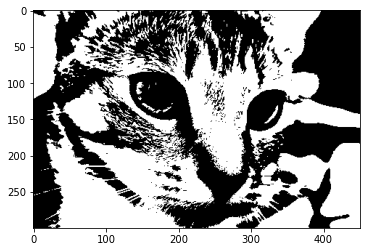

In [43]:
single_channel = image[:,:,0]
mask = single_channel > 150
plt.imshow(mask);

And now we can recover all the pixels that are "selected" by this mask:

In [44]:
single_channel[mask]

array([152, 152, 154, ..., 161, 161, 162], dtype=uint8)

## 4.6 Reshaping arrays

Often it is necessary to reshape arrays, i.e. keep elements unchanged but change their position. There are multiple functions that allow one to do this. The main one is of course ```reshape```.

### 4.6.1 ```reshape```

Given an array of $MxN$ elements, one can reshape it with a shape $OxP$ as long as $M*N = O*P$.

In [45]:
reshaped = np.reshape(normal_array,(2,6))
reshaped

array([[ 12.99205086,   7.7157832 , 100.        ,  50.        ,
          9.19391119,   7.92142871],
       [ 13.31222213,   8.19957688,  11.08009573,  23.        ,
         12.71096417,  10.09637761]])

In [46]:
reshaped.shape

(2, 6)

In [47]:
300*451/150

902.0

With the image as example, we can reshape the array from $300x451x3$ to $150x902x3$:

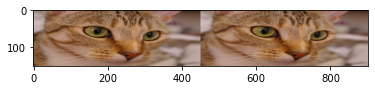

In [48]:
plt.imshow(np.reshape(image, (150,902,3)))

### 4.6.2 Flattening

It's also possible to simply flatten an array i.e. remove all dimensions to create a 1D array. This can be useful for example to create a histogram of a high-dimensional array.

In [49]:
flattened = np.ravel(normal_array)
flattened

array([ 12.99205086,   7.7157832 , 100.        ,  50.        ,
         9.19391119,   7.92142871,  13.31222213,   8.19957688,
        11.08009573,  23.        ,  12.71096417,  10.09637761])

In [50]:
flattened.shape

(12,)

### 4.6.3 Dimension collapse

Another common way that leads to reshaping is projection. Let's consider again our ```normal_array```:

In [51]:
normal_array

array([[ 12.99205086,   7.7157832 , 100.        ,  50.        ],
       [  9.19391119,   7.92142871,  13.31222213,   8.19957688],
       [ 11.08009573,  23.        ,  12.71096417,  10.09637761]])

We can project all values along the first or second axis, to recover for each row/column the largest value:

In [52]:
proj0 = np.max(normal_array, axis = 0)
proj0

array([ 12.99205086,  23.        , 100.        ,  50.        ])

In [53]:
proj0.shape

(4,)

We see that our projected array has lost a dimension, the one along which we performed the projection. With the image, we could project all channels along the third dimension:

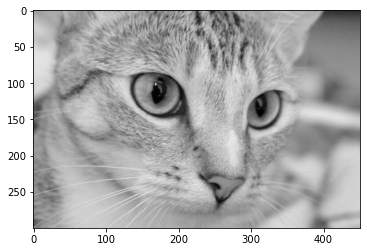

In [54]:
plt.imshow(image.max(axis=2));

### 4.6.4 Swaping dimensions

We can also simply exchange the position of dimensions. This can be achieved in different ways. For example we can ```np.roll``` dimensions, i.e. circularly shift dimensions. This conserves the relative oder of all axes:

In [55]:
array3D = np.ones((4, 10, 20))
array3D.shape

(4, 10, 20)

In [56]:
array_rolled = np.rollaxis(array3D, axis=1, start=0)
array_rolled.shape

(10, 4, 20)

Alternatively you can swap two axes. This doesn't preserver their relative positions: 

In [57]:
array_swapped = np.swapaxes(array3D, 0,2)
array_swapped.shape

(20, 10, 4)

With the image, we can for example swap the two first axes:

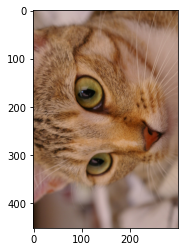

In [58]:
plt.imshow(np.swapaxes(image, 0, 1));

### 4.6.5 Change positions

Finally, we can also change the position of elements without changing the shape of the array. For example if we have an array with two columns, we can swap them:

In [59]:
array2D = np.random.normal(0,1,(4,2))
array2D

array([[ 1.69380702,  0.45317243],
       [ 0.97985485, -1.10186616],
       [ 2.16001609,  0.29160533],
       [-0.29204481, -0.80523649]])

In [60]:
np.fliplr(array2D)

array([[ 0.45317243,  1.69380702],
       [-1.10186616,  0.97985485],
       [ 0.29160533,  2.16001609],
       [-0.80523649, -0.29204481]])

Similarly, if we have two rows:

In [61]:
array2D = np.random.normal(0,1,(2,4))
array2D

array([[-0.00285876,  0.76241924,  1.18546015, -0.13881594],
       [-1.42554951,  0.36561497,  0.73252833, -1.43307846]])

In [62]:
np.flipud(array2D)

array([[-1.42554951,  0.36561497,  0.73252833, -1.43307846],
       [-0.00285876,  0.76241924,  1.18546015, -0.13881594]])

For more complex cases you can also use the more general ```np.flip()``` function.

With the image, flipping a dimension just mirrors the picture. To do that we select a single channel:

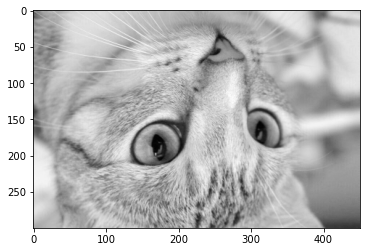

In [63]:
plt.imshow(np.flipud(image[:,:,0]));